Gini for Breast Cancer

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        71
           1       0.87      0.93      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



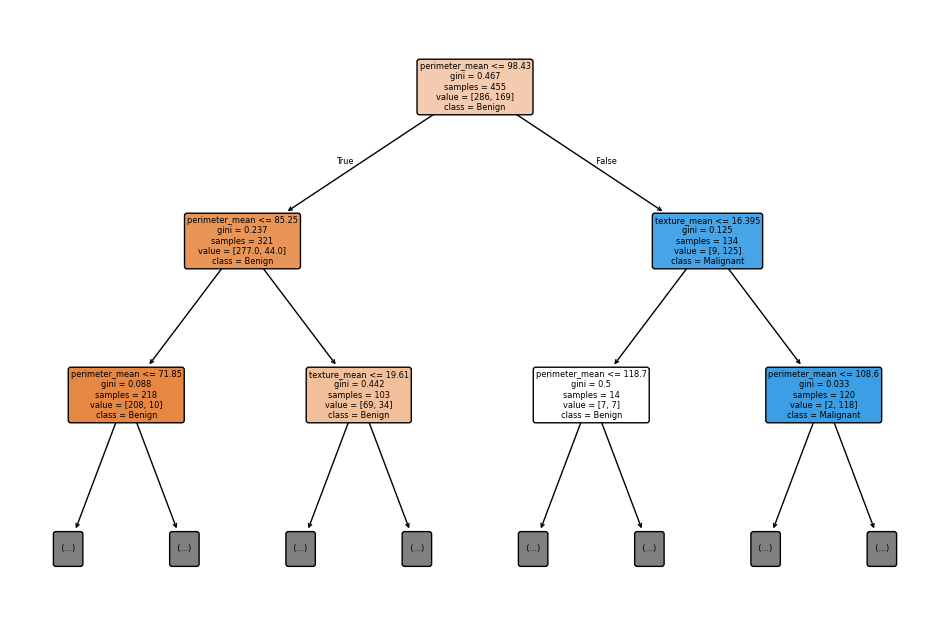

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the breast cancer dataset
df = pd.read_csv('icancer_data.csv')

# Selecting features and target
feature_columns = ['radius_mean', 'texture_mean', 'perimeter_mean']  # Example features
target_column = 'diagnosis'  # Target column

# Encoding the target variable (assuming 'diagnosis' is categorical)
df[target_column] = df[target_column].astype('category').cat.codes

# Define features and target
X = df[feature_columns]
y = df[target_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=feature_columns, class_names=['Benign', 'Malignant'], rounded=True, max_depth=2)
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def gini_index(label):
  prob = label.value_counts(normalize = True)
  return 1-np.sum(prob**2)

def info_gain(df,feature,target):
  gini_before = gini_index(df[target])
  subsets = [df[df[feature]==value][target] for value in df[feature].unique()]
  weighted = sum((len(subset)/len(df))*gini_index(subset) for subset in subsets)
  return gini_before - weighted


features = ['radius_mean', 'texture_mean', 'perimeter_mean']
target = 'diagnosis'

df = pd.read_csv('icancer_data.csv')

print(f'Initial Gini Index:{gini_index(df[target])}')
for feature in features:
  print(f'Information Gain for {feature}:{info_gain(df,feature,target)}')
  for value in df[feature].unique():
    subset = df[df[feature]==value][target]
    print(f'Gini Index for {value}:{gini_index(subset)}')

Initial Gini Index:0.4675300607546925
Information Gain for radius_mean:0.42212877194391335
Gini Index for 17.99:0.0
Gini Index for 20.57:0.0
Gini Index for 19.69:0.0
Gini Index for 11.42:0.0
Gini Index for 20.29:0.0
Gini Index for 12.45:0.5
Gini Index for 18.25:0.0
Gini Index for 13.71:0.5
Gini Index for 13.0:0.4444444444444444
Gini Index for 12.46:0.4444444444444444
Gini Index for 16.02:0.0
Gini Index for 15.78:0.0
Gini Index for 19.17:0.0
Gini Index for 15.85:0.0
Gini Index for 13.73:0.0
Gini Index for 14.54:0.0
Gini Index for 14.68:0.0
Gini Index for 16.13:0.0
Gini Index for 19.81:0.0
Gini Index for 13.54:0.0
Gini Index for 13.08:0.0
Gini Index for 9.504:0.0
Gini Index for 15.34:0.0
Gini Index for 21.16:0.0
Gini Index for 16.65:0.0
Gini Index for 17.14:0.0
Gini Index for 14.58:0.5
Gini Index for 18.61:0.0
Gini Index for 15.3:0.0
Gini Index for 17.57:0.0
Gini Index for 18.63:0.0
Gini Index for 11.84:0.5
Gini Index for 17.02:0.0
Gini Index for 19.27:0.0
Gini Index for 16.74:0.0
Gini I